In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
titanic = pd.read_csv('../02数据预备_清洗及特征工程/data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 对Age进行自定义分段

In [4]:
cut_points = [0,18,25,35,60,100]
titanic['Age_bin'] = pd.cut(titanic['Age'], bins = cut_points)
grouped = titanic.groupby('Age_bin', observed = False)
grouped['PassengerId'].count()

Age_bin
(0, 18]      139
(18, 25]     162
(25, 35]     196
(35, 60]     195
(60, 100]     22
Name: PassengerId, dtype: int64

# 对Age进行等宽分段

In [5]:
titanic['Age_width'] = pd.cut(titanic.Age, 20)
grouped = titanic.groupby('Age_width')
grouped['PassengerId'].count()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_34344\3944335203.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby('Age_width')


Age_width
(0.34, 4.399]       40
(4.399, 8.378]      14
(8.378, 12.357]     15
(12.357, 16.336]    31
(16.336, 20.315]    79
(20.315, 24.294]    98
(24.294, 28.273]    85
(28.273, 32.252]    84
(32.252, 36.231]    73
(36.231, 40.21]     45
(40.21, 44.189]     35
(44.189, 48.168]    35
(48.168, 52.147]    29
(52.147, 56.126]    16
(56.126, 60.105]    13
(60.105, 64.084]    11
(64.084, 68.063]     4
(68.063, 72.042]     5
(72.042, 76.021]     1
(76.021, 80.0]       1
Name: PassengerId, dtype: int64

# 对Age进行等深分段

In [6]:
titanic['Age_depth'] = pd.qcut(titanic.Age, 5)
grouped = titanic.groupby('Age_depth')
grouped['PassengerId'].count()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_34344\3006252394.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby('Age_depth')


Age_depth
(0.419, 19.0]    164
(19.0, 25.0]     137
(25.0, 31.8]     127
(31.8, 41.0]     144
(41.0, 80.0]     142
Name: PassengerId, dtype: int64

# 不同分段结果对比

In [7]:
titanic[['PassengerId', 'Age', 'Age_bin', 'Age_width', 'Age_depth']]

,PassengerId,Age,Age_bin,Age_width,Age_depth
0,1,22.0,"(18.0, 25.0]","(20.315, 24.294]","(19.0, 25.0]"
1,2,38.0,"(35.0, 60.0]","(36.231, 40.21]","(31.8, 41.0]"
2,3,26.0,"(25.0, 35.0]","(24.294, 28.273]","(25.0, 31.8]"
3,4,35.0,"(25.0, 35.0]","(32.252, 36.231]","(31.8, 41.0]"
4,5,35.0,"(25.0, 35.0]","(32.252, 36.231]","(31.8, 41.0]"
...,...,...,...,...,...
886,887,27.0,"(25.0, 35.0]","(24.294, 28.273]","(25.0, 31.8]"
887,888,19.0,"(18.0, 25.0]","(16.336, 20.315]","(0.419, 19.0]"
888,889,NaN,NaN,NaN,NaN
889,890,26.0,"(25.0, 35.0]","(24.294, 28.273]","(25.0, 31.8]"


# 对Age绘制直方图

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

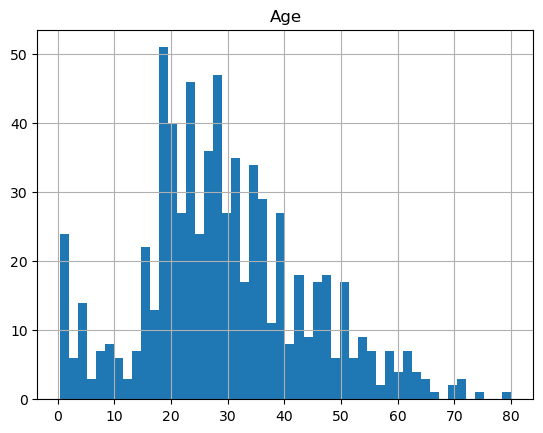

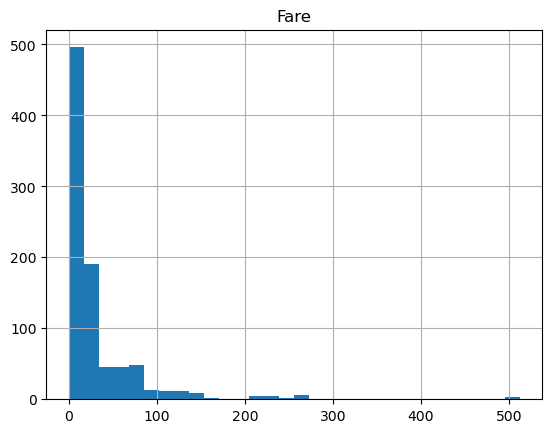

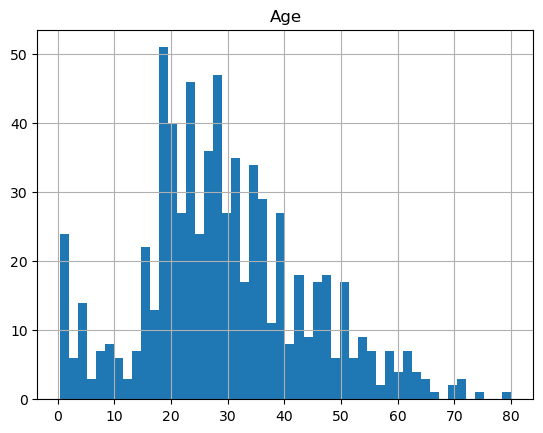

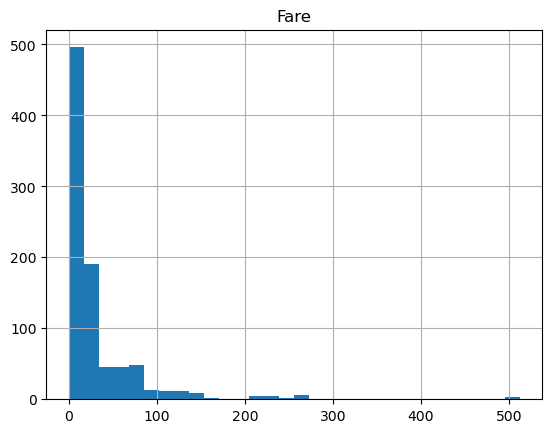

In [11]:
titanic.hist(column = 'Age', bins = 50)
titanic.hist(column = 'Fare', bins = 30)
plt.show()